In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [491]:
saber = pd.read_csv("batters-saber.csv")
saber = saber.drop(columns=['playerid'])
saber.head(10)

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,BB,IBB,HBP,SF,SH,WAR,BABIP,Bat,wRC+
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,81,8,8,5,0,10.4,0.368,62.2,185
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,122,25,10,4,0,9.8,0.346,66.1,191
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,69,11,4,7,0,5.9,0.375,54.4,170
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,68,2,7,2,0,7.6,0.373,52.6,166
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,96,2,12,3,0,7.6,0.289,48.0,157
5,Jose Ramirez,Indians,157,578,698,156,75,38,4,39,106,15,8,6,0,8.0,0.252,38.5,146
6,Nolan Arenado,Rockies,156,590,673,175,97,38,2,38,73,10,3,6,1,5.7,0.314,26.0,132
7,Paul Goldschmidt,Diamondbacks,158,593,690,172,99,35,5,33,90,11,6,0,0,5.1,0.359,37.5,145
8,Brandon Nimmo,Mets,140,433,535,114,61,28,8,17,80,2,22,0,0,4.5,0.351,31.9,149
9,Trevor Story,Rockies,157,598,656,174,89,42,6,37,47,3,7,4,0,5.0,0.345,21.7,127


In [492]:
WAR = saber.copy()
WAR = WAR.sort_values(by=['WAR'], ascending=False)
WAR.head(10)

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,BB,IBB,HBP,SF,SH,WAR,BABIP,Bat,wRC+
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,81,8,8,5,0,10.4,0.368,62.2,185
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,122,25,10,4,0,9.8,0.346,66.1,191
5,Jose Ramirez,Indians,157,578,698,156,75,38,4,39,106,15,8,6,0,8.0,0.252,38.5,146
20,Francisco Lindor,Indians,158,661,745,183,101,42,2,38,70,7,8,3,3,7.6,0.279,27.1,130
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,68,2,7,2,0,7.6,0.373,52.6,166
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,96,2,12,3,0,7.6,0.289,48.0,157
19,Matt Chapman,Athletics,145,547,616,152,80,42,6,24,58,0,9,2,0,6.5,0.338,27.4,137
10,Anthony Rendon,Nationals,136,529,597,163,93,44,2,24,55,5,5,8,0,6.3,0.323,28.8,140
12,Manny Machado,- - -,162,632,709,188,113,35,3,37,70,18,2,5,0,6.2,0.304,34.5,141
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,69,11,4,7,0,5.9,0.375,54.4,170


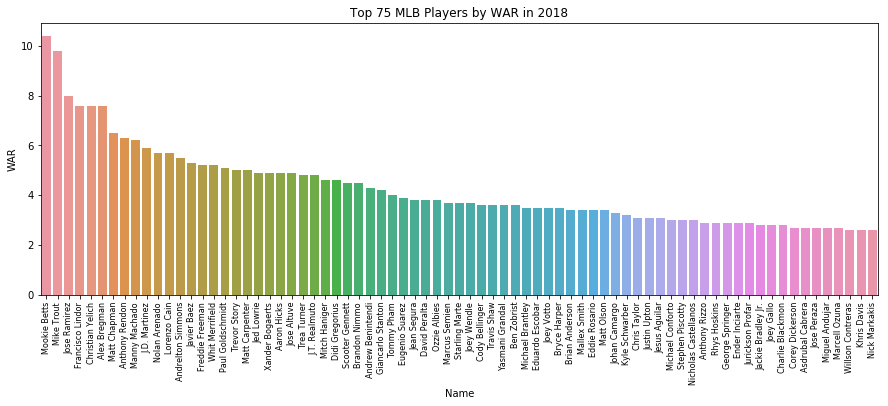

In [493]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="WAR", data=WAR.head(75))
ax.set_xticklabels(WAR['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by WAR in 2018')
plt.show()

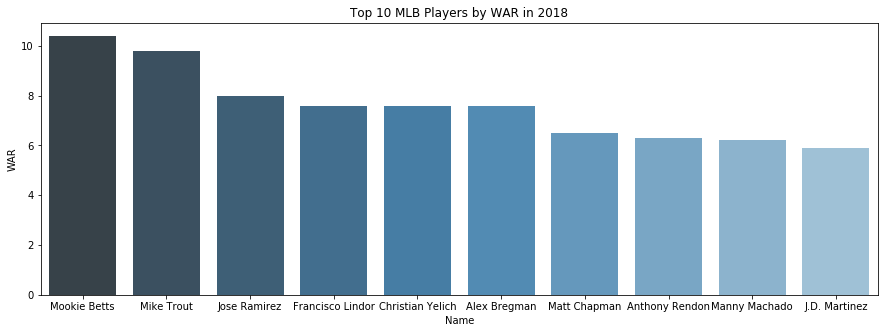

In [494]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="WAR", data=WAR.head(10), palette="Blues_d")
ax.set_xticklabels(WAR['Name'], rotation='horizontal', fontsize=10)
ax.set_title('Top 10 MLB Players by WAR in 2018')
plt.show()

In [495]:
saber = saber.sort_values(by=['Bat'], ascending=False)
saber.head(10)

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,BB,IBB,HBP,SF,SH,WAR,BABIP,Bat,wRC+
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,122,25,10,4,0,9.8,0.346,66.1,191
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,81,8,8,5,0,10.4,0.368,62.2,185
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,69,11,4,7,0,5.9,0.375,54.4,170
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,68,2,7,2,0,7.6,0.373,52.6,166
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,96,2,12,3,0,7.6,0.289,48.0,157
5,Jose Ramirez,Indians,157,578,698,156,75,38,4,39,106,15,8,6,0,8.0,0.252,38.5,146
7,Paul Goldschmidt,Diamondbacks,158,593,690,172,99,35,5,33,90,11,6,0,0,5.1,0.359,37.5,145
12,Manny Machado,- - -,162,632,709,188,113,35,3,37,70,18,2,5,0,6.2,0.304,34.5,141
8,Brandon Nimmo,Mets,140,433,535,114,61,28,8,17,80,2,22,0,0,4.5,0.351,31.9,149
15,Matt Carpenter,Cardinals,156,564,677,145,67,42,0,36,102,17,6,4,0,5.0,0.291,31.7,138


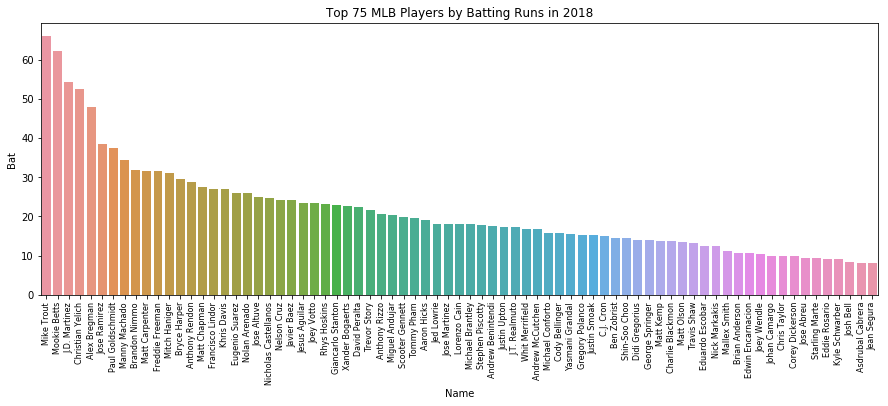

In [496]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="Bat", data=saber.head(75))
ax.set_xticklabels(saber['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Batting Runs in 2018')
plt.show()

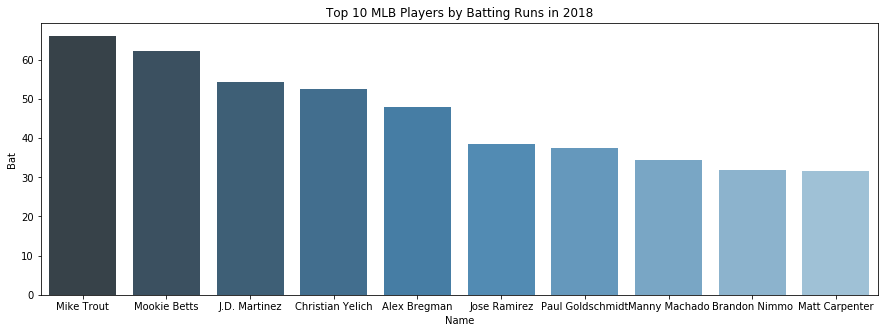

In [497]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="Bat", data=saber.head(10), palette="Blues_d")
ax.set_xticklabels(saber['Name'], rotation='horizontal', fontsize=10)
ax.set_title('Top 10 MLB Players by Batting Runs in 2018')
plt.show()

In [498]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + .2, point['y'], str(point['val']))

In [499]:
avg = saber.copy()
avg['AVG'] = avg['H'] / avg['AB']
avg = avg.sort_values(by=['AVG'], ascending=False)
avg.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,BB,IBB,HBP,SF,SH,WAR,BABIP,Bat,wRC+,AVG
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,81,8,8,5,0,10.4,0.368,62.2,185,0.346154
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,69,11,4,7,0,5.9,0.375,54.4,170,0.330404
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,68,2,7,2,0,7.6,0.373,52.6,166,0.325784
26,Jose Altuve,Astros,137,534,599,169,125,29,2,13,55,4,6,1,3,4.9,0.352,25.0,135,0.316479
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,122,25,10,4,0,9.8,0.346,66.1,191,0.312102


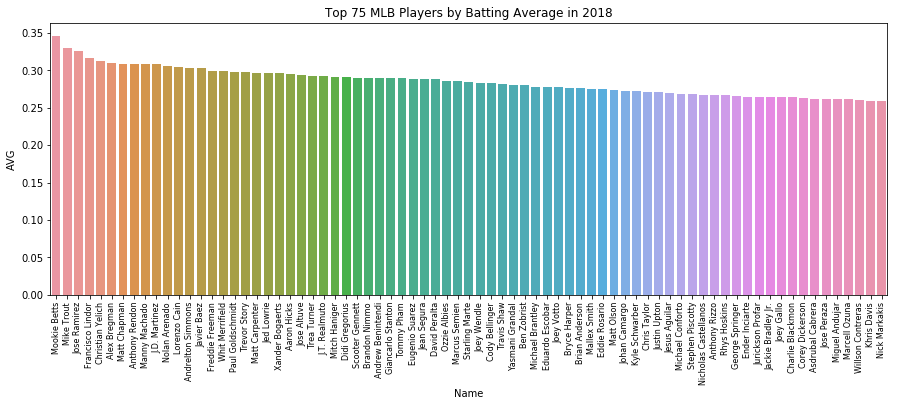

In [500]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="AVG", data=avg.head(75))
ax.set_xticklabels(b_stand['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Batting Average in 2018')
plt.show()

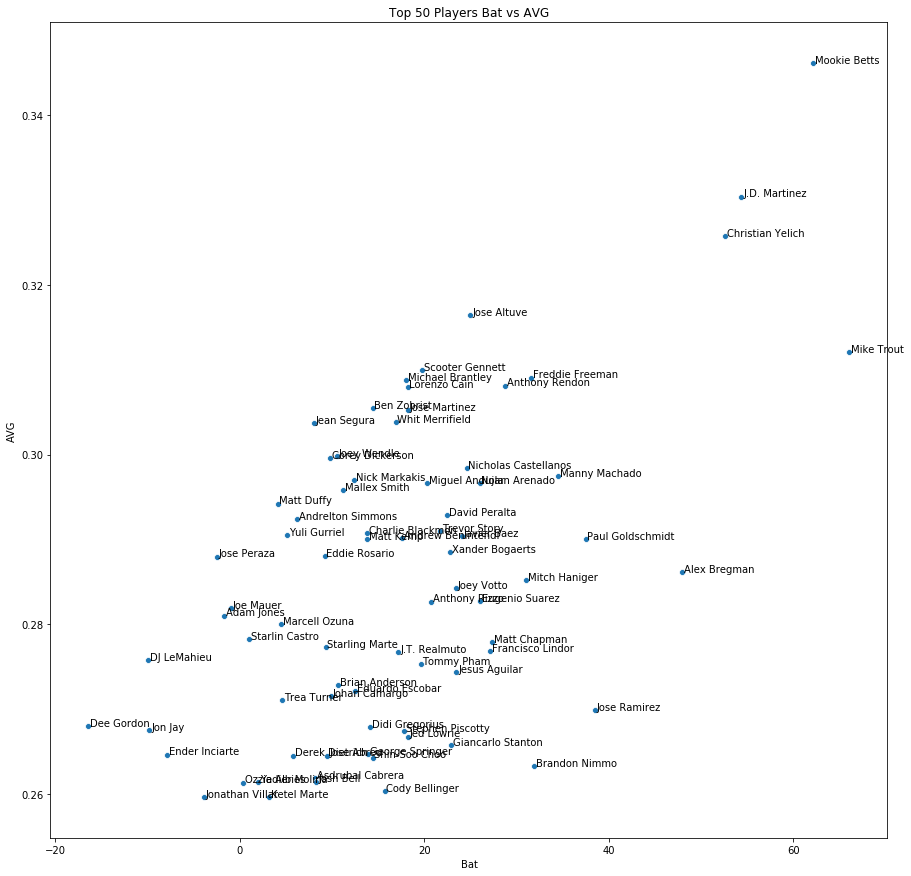

In [501]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="AVG", data=avg.head(75), markers=True)
ax.set_title("Top 50 Players Bat vs AVG")

label_point(avg.head(75).Bat, avg.head(75).AVG, avg.head(75).Name, plt.gca())

In [502]:
obp = avg.copy()
obp['OBP'] = (obp['H'] + obp['BB'] + obp['HBP']) / (obp['AB'] + obp['BB'] + obp['HBP'] + obp['SF'])
obp = obp.sort_values(by=['OBP'], ascending=False)
obp.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,IBB,HBP,SF,SH,WAR,BABIP,Bat,wRC+,AVG,OBP
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,25,10,4,0,9.8,0.346,66.1,191,0.312102,0.459638
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,8,8,5,0,10.4,0.368,62.2,185,0.346154,0.438111
18,Joey Votto,Reds,145,503,623,143,101,28,2,12,...,6,9,3,0,3.5,0.333,23.4,131,0.284294,0.417335
8,Brandon Nimmo,Mets,140,433,535,114,61,28,8,17,...,2,22,0,0,4.5,0.351,31.9,149,0.263279,0.403738
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,...,2,7,2,0,7.6,0.373,52.6,166,0.325784,0.402458


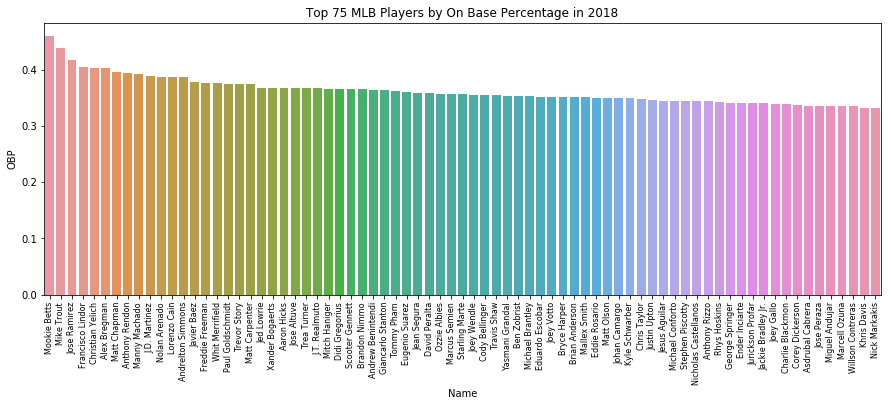

In [503]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="OBP", data=obp.head(75))
ax.set_xticklabels(b_stand['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by On Base Percentage in 2018')
plt.show()

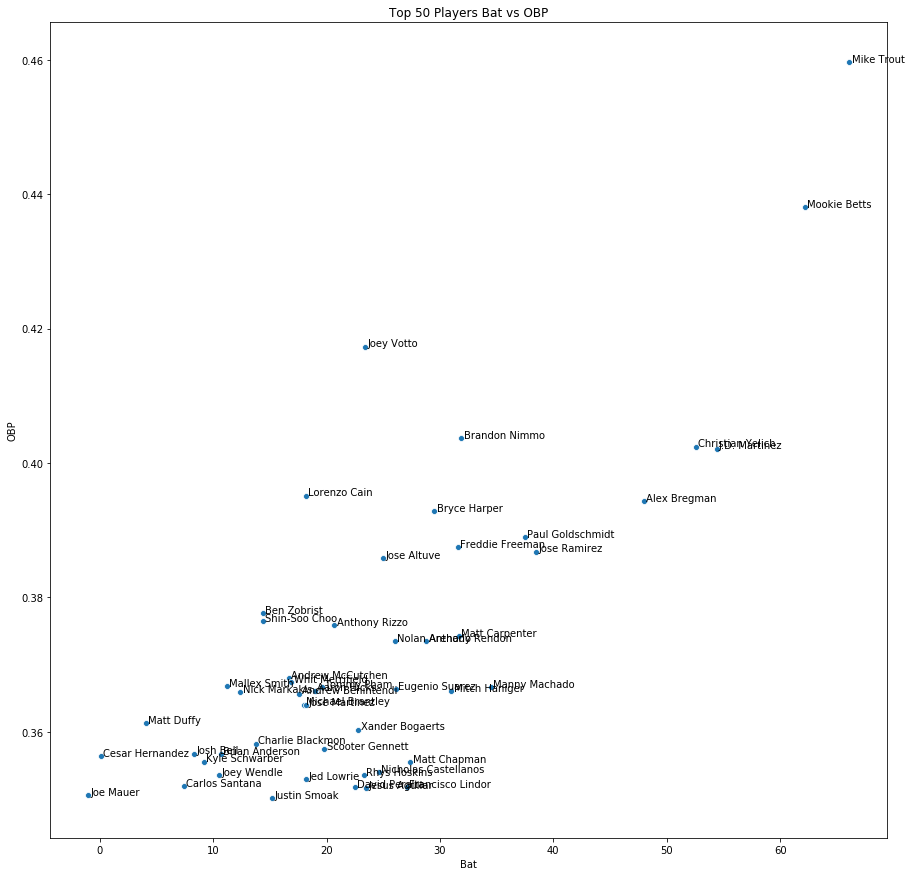

In [504]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="OBP", data=obp.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs OBP")

label_point(obp.head(50).Bat, obp.head(50).OBP, obp.head(50).Name, plt.gca())

In [505]:
slg = obp.copy()
slg['SLG'] = (slg['1B'] + 2 * slg['2B'] + 3 * slg['3B'] + 4 * slg['HR']) / slg['AB']
slg = slg.sort_values(by=['SLG'], ascending=False)
slg.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,HBP,SF,SH,WAR,BABIP,Bat,wRC+,AVG,OBP,SLG
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,8,5,0,10.4,0.368,62.2,185,0.346154,0.438111,0.640385
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,...,4,7,0,5.9,0.375,54.4,170,0.330404,0.402157,0.629174
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,10,4,0,9.8,0.346,66.1,191,0.312102,0.459638,0.628450
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,...,7,2,0,7.6,0.373,52.6,166,0.325784,0.402458,0.597561
9,Trevor Story,Rockies,157,598,656,174,89,42,6,37,...,7,4,0,5.0,0.345,21.7,127,0.290970,0.347561,0.566890


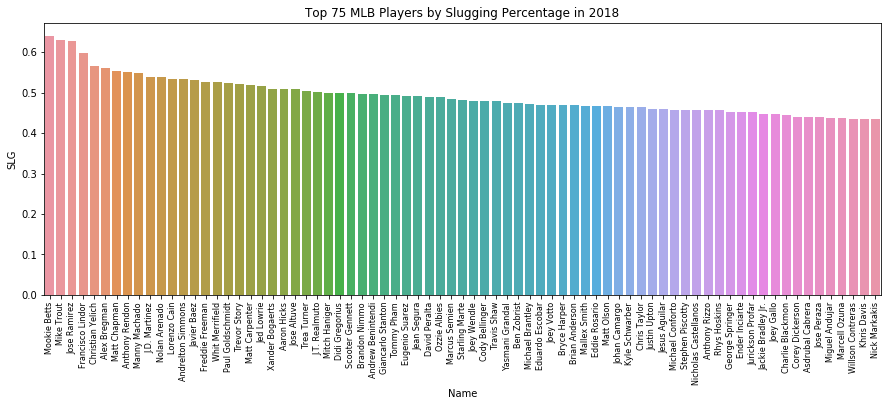

In [506]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="SLG", data=slg.head(75))
ax.set_xticklabels(b_stand['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Slugging Percentage in 2018')
plt.show()

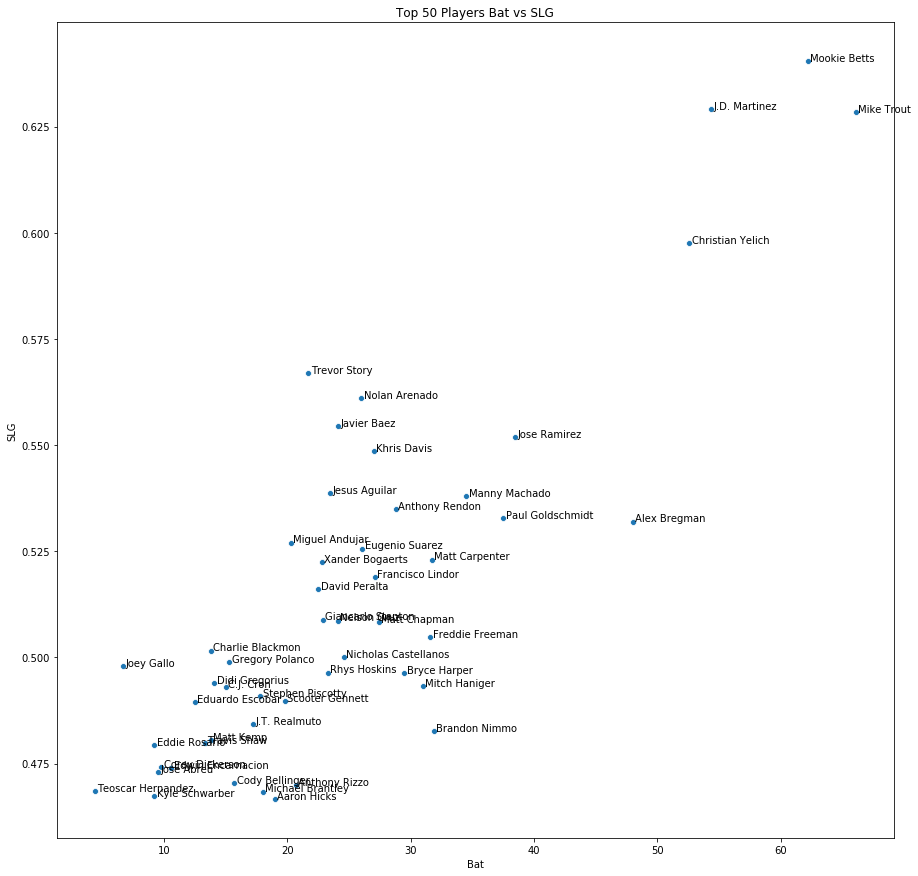

In [507]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="SLG", data=slg.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs SLG")

label_point(slg.head(50).Bat, slg.head(50).SLG, slg.head(50).Name, plt.gca())

In [508]:
ops = slg.copy()
ops['OPS'] = ops['OBP'] + ops['SLG']
ops = ops.sort_values(by=['OPS'], ascending=False)
ops.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,SF,SH,WAR,BABIP,Bat,wRC+,AVG,OBP,SLG,OPS
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,4,0,9.8,0.346,66.1,191,0.312102,0.459638,0.628450,1.088088
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,5,0,10.4,0.368,62.2,185,0.346154,0.438111,0.640385,1.078495
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,...,7,0,5.9,0.375,54.4,170,0.330404,0.402157,0.629174,1.031331
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,...,2,0,7.6,0.373,52.6,166,0.325784,0.402458,0.597561,1.000019
5,Jose Ramirez,Indians,157,578,698,156,75,38,4,39,...,6,0,8.0,0.252,38.5,146,0.269896,0.386819,0.551903,0.938723


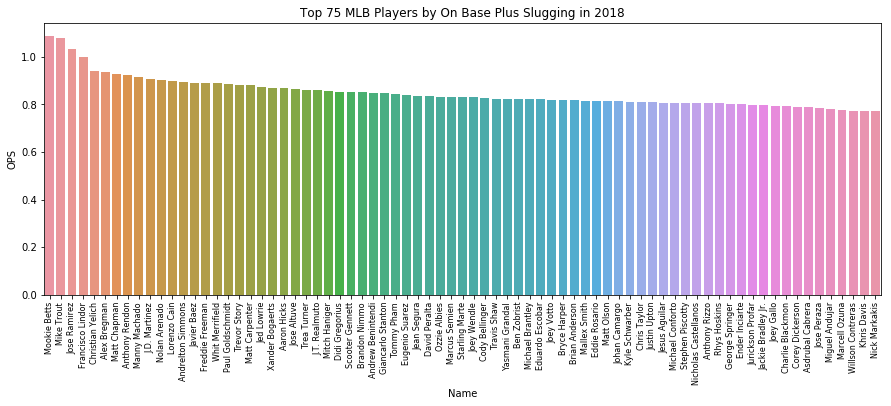

In [509]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="OPS", data=ops.head(75))
ax.set_xticklabels(b_stand['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by On Base Plus Slugging in 2018')
plt.show()

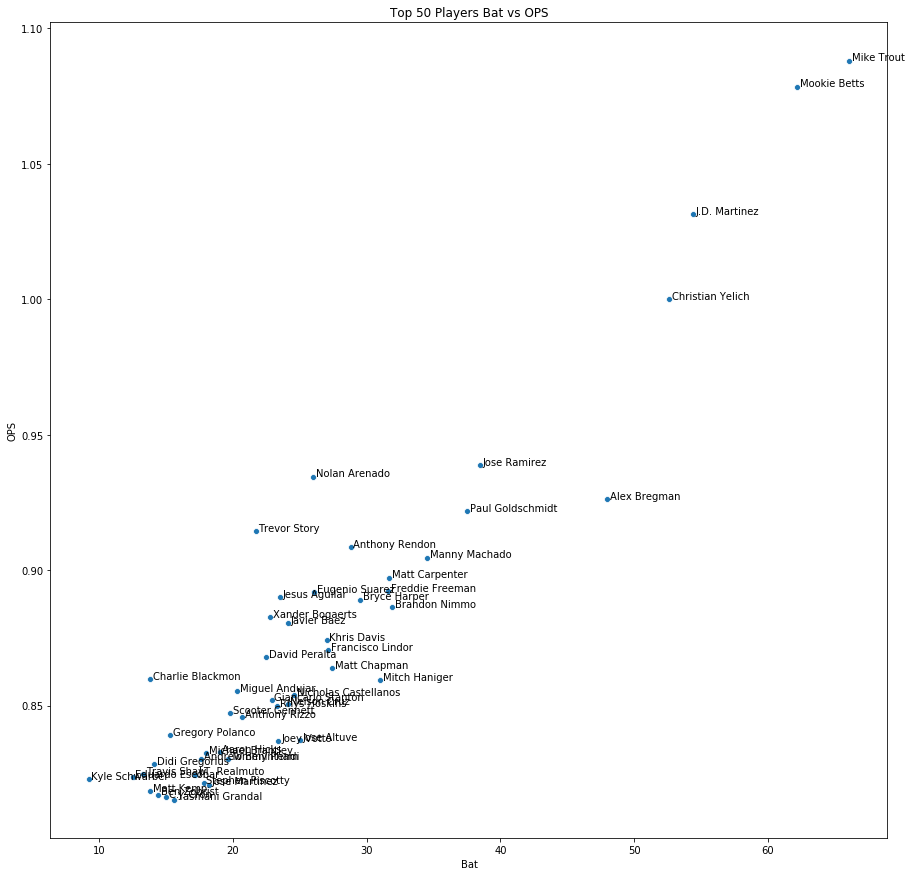

In [510]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="OPS", data=ops.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs OPS")

label_point(ops.head(50).Bat, ops.head(50).OPS, ops.head(50).Name, plt.gca())

In [511]:
iso = ops.copy()
iso['ISO'] = iso['SLG'] - iso['AVG']
iso = iso.sort_values(by=['ISO'], ascending=False)
iso.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,SH,WAR,BABIP,Bat,wRC+,AVG,OBP,SLG,OPS,ISO
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,0,9.8,0.346,66.1,191,0.312102,0.459638,0.628450,1.088088,0.316348
25,Khris Davis,Athletics,151,576,654,142,65,28,1,48,...,0,2.6,0.261,27.0,135,0.246528,0.325688,0.548611,0.874299,0.302083
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,...,0,5.9,0.375,54.4,170,0.330404,0.402157,0.629174,1.031331,0.298770
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,0,10.4,0.368,62.2,185,0.346154,0.438111,0.640385,1.078495,0.294231
60,Joey Gallo,Rangers,148,500,577,103,38,24,1,40,...,0,2.8,0.249,6.7,110,0.206000,0.311958,0.498000,0.809958,0.292000


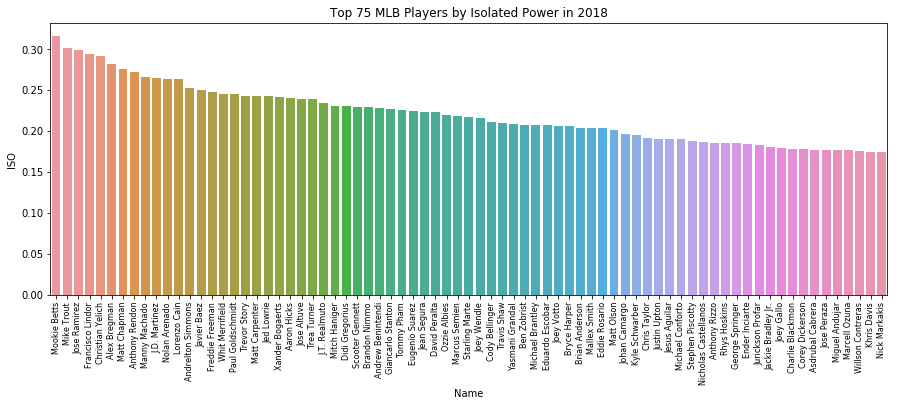

In [512]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="ISO", data=iso.head(75))
ax.set_xticklabels(b_stand['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by Isolated Power in 2018')
plt.show()

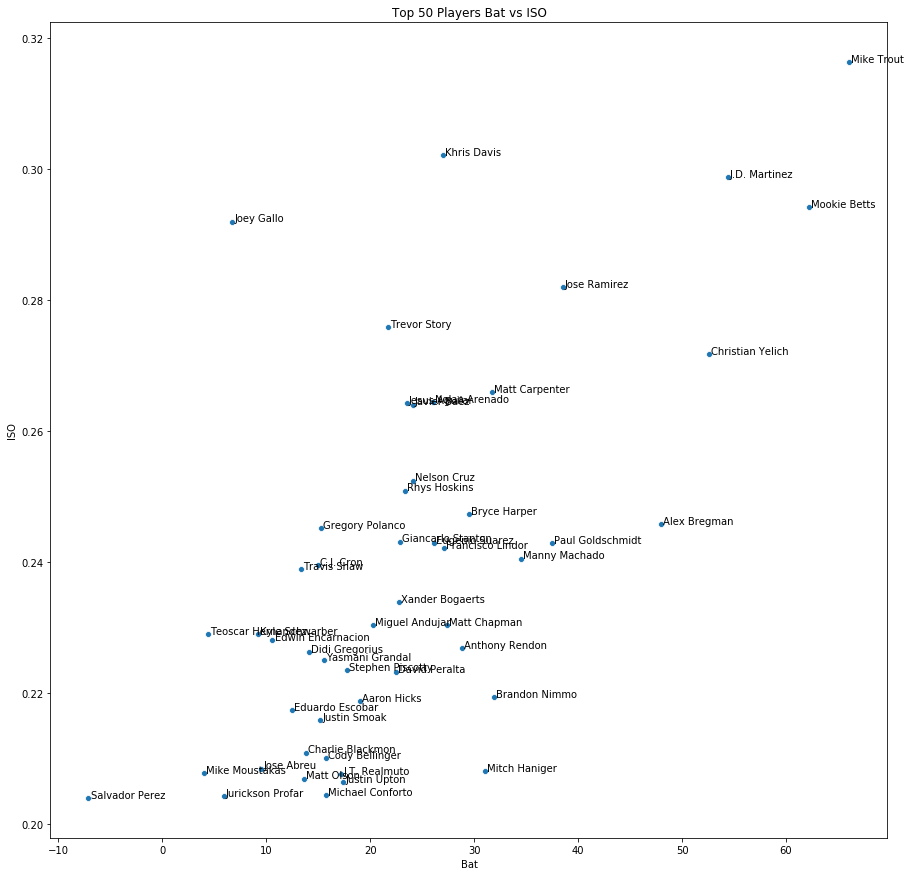

In [513]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="ISO", data=iso.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs ISO")

label_point(iso.head(50).Bat, iso.head(50).ISO, iso.head(50).Name, plt.gca())

In [514]:
wOBA = iso.copy()
wOBA['wOBA'] = ((.690 * (wOBA['BB'] - wOBA['IBB'])) + (.720 * wOBA['HBP']) + (.880 * wOBA['1B']) + \
                (1.247 * wOBA['2B']) + (1.578 * wOBA['3B']) + (2.031 * wOBA['HR'])) / \
                (wOBA['AB'] + wOBA['BB'] - wOBA['IBB'] + wOBA['SF'] + wOBA['HBP'])
wOBA = wOBA.sort_values(by=['wOBA'], ascending=False)
wOBA.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,WAR,BABIP,Bat,wRC+,AVG,OBP,SLG,OPS,ISO,wOBA
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,10.4,0.368,62.2,185,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,9.8,0.346,66.1,191,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,...,5.9,0.375,54.4,170,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,...,7.6,0.373,52.6,166,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,...,7.6,0.289,48.0,157,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727


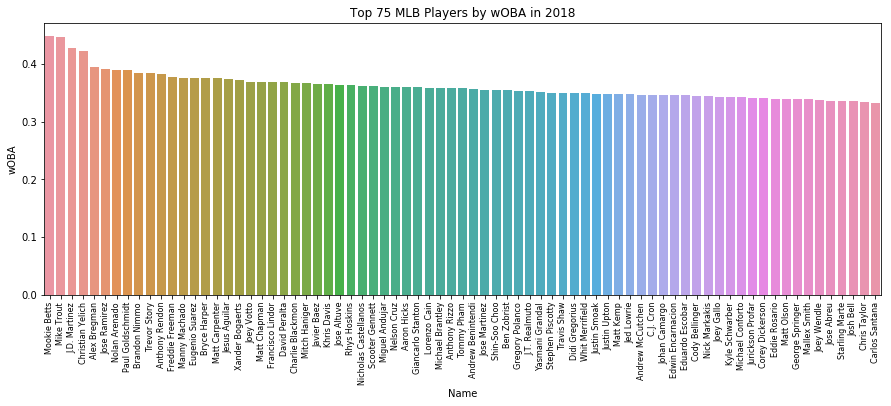

In [515]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wOBA", data=wOBA.head(75))
ax.set_xticklabels(wOBA['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wOBA in 2018')
plt.show()

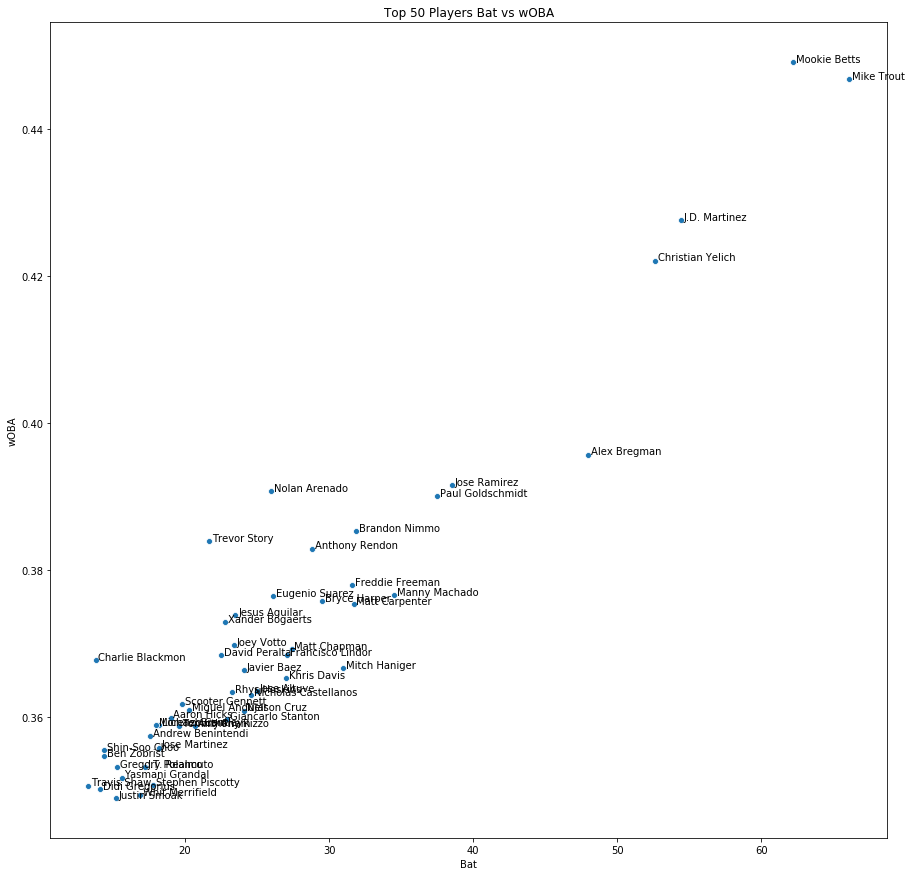

In [516]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wOBA", data=wOBA.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wOBA")

label_point(wOBA.head(50).Bat, wOBA.head(50).wOBA, wOBA.head(50).Name, plt.gca())

In [517]:
#from https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=8&season=2018&month=0&season1=1901&ind=0&team=0,ss&rost=0&age=0&filter=&players=0&sort=1,d
league_wOBA = .315
league_runs = 21630
league_pa = 185139
wOBA_scale = 1.226

In [518]:
#wRAA = ((wOBA – lgwOBA)/wOBA Scale) * PA
wRAA = wOBA.copy()
wRAA['wRAA'] = ((wRAA['wOBA'] - league_wOBA) / wOBA_scale) * wRAA['PA']
wRAA = wRAA.sort_values(by=['wRAA'], ascending=False)
wRAA.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,BABIP,Bat,wRC+,AVG,OBP,SLG,OPS,ISO,wOBA,wRAA
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,0.368,62.2,185,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012,67.115084
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,0.346,66.1,191,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699,65.312547
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,...,0.375,54.4,170,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599,59.605698
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,...,0.373,52.6,166,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096,56.867203
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,...,0.289,48.0,157,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727,46.421251


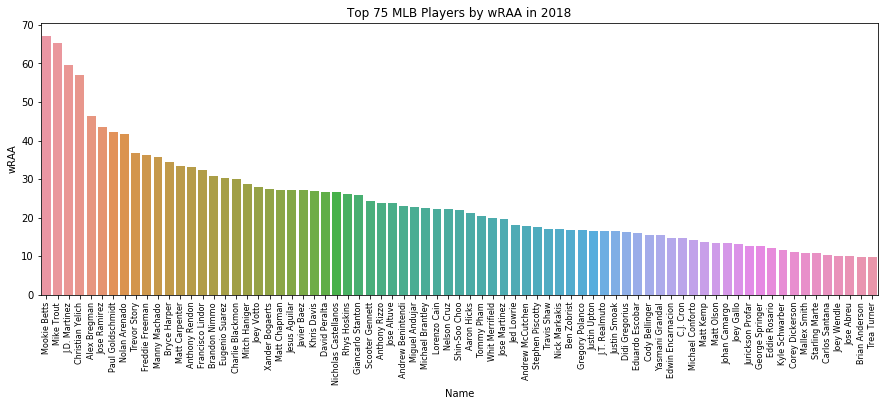

In [519]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wRAA", data=wRAA.head(75))
ax.set_xticklabels(wRAA['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wRAA in 2018')
plt.show()

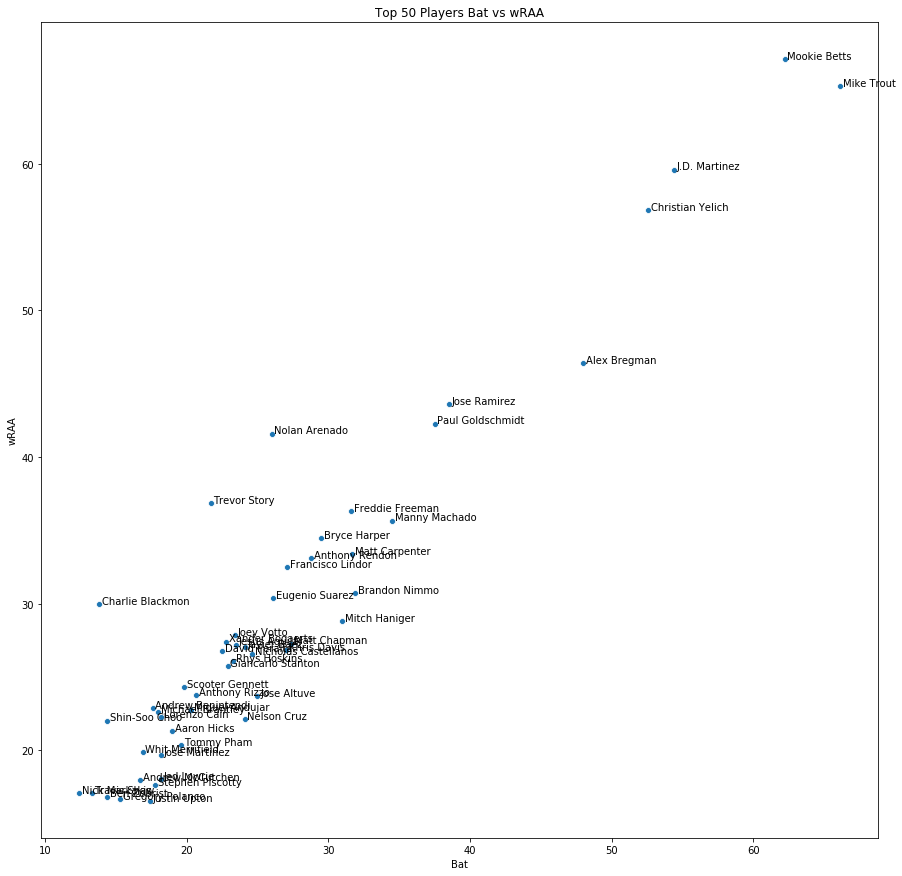

In [520]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wRAA", data=wRAA.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wRAA")

label_point(wRAA.head(50).Bat, wRAA.head(50).wRAA, wRAA.head(50).Name, plt.gca())

In [521]:
#wRC = (((wOBA-League wOBA)/wOBA Scale)+(League R/PA))*PA
wRC = wRAA.copy()
wRC['wRC'] = (((wRC['wOBA'] - league_wOBA) / wOBA_scale) + league_runs / league_pa) * wRC['PA']
wRC = wRC.sort_values(by=['wRC'], ascending=False)
wRC.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,Bat,wRC+,AVG,OBP,SLG,OPS,ISO,wOBA,wRAA,wRC
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,62.2,185,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012,67.115084,138.849402
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,66.1,191,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699,65.312547,136.345878
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,...,54.4,170,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599,59.605698,135.429107
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,...,52.6,166,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096,56.867203,132.924274
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,...,48.0,157,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727,46.421251,128.787203


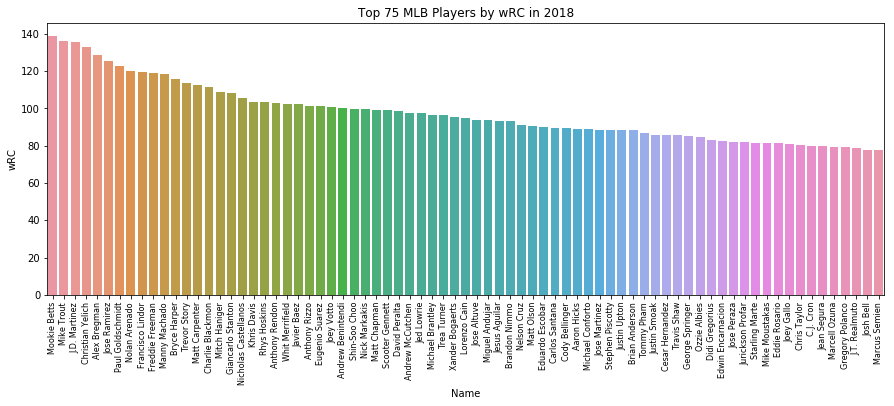

In [522]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wRC", data=wRC.head(75))
ax.set_xticklabels(wRC['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wRC in 2018')
plt.show()

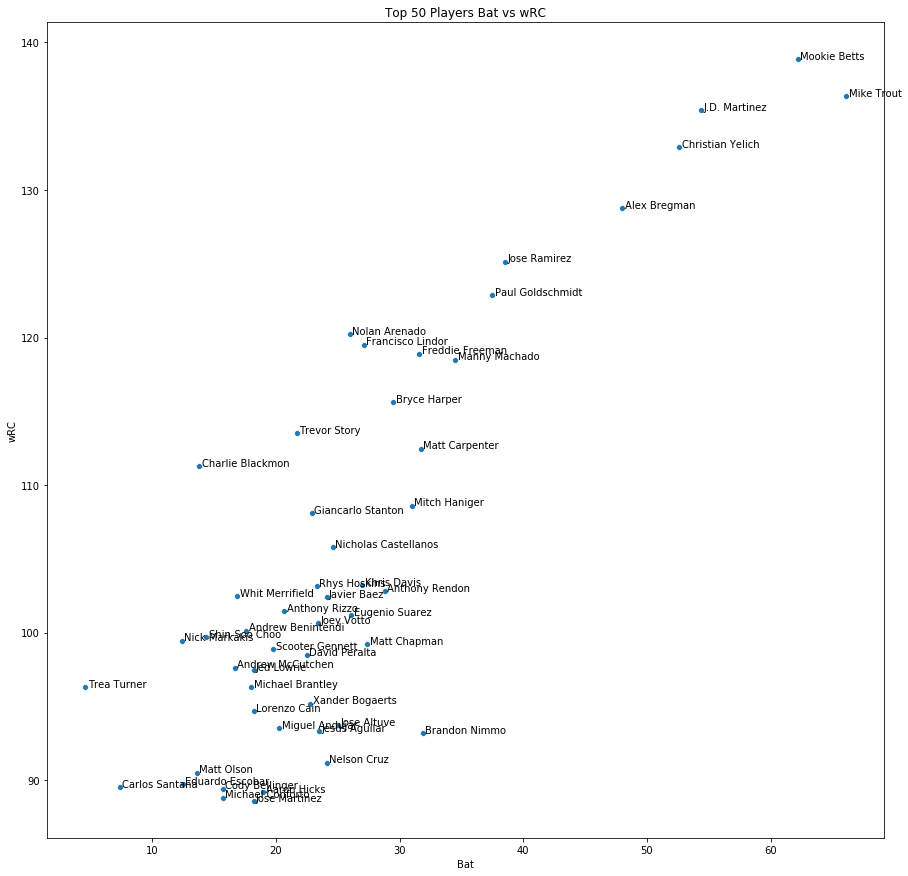

In [523]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wRC", data=wRC.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wRC")

label_point(wRC.head(50).Bat, wRC.head(50).wRC, wRC.head(50).Name, plt.gca())

In [524]:
wRC_plus = wRC.copy()
wRC_plus = wRC_plus.sort_values(by=['wRC+'], ascending=False)
wRC_plus.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,Bat,wRC+,AVG,OBP,SLG,OPS,ISO,wOBA,wRAA,wRC
1,Mike Trout,Angels,140,471,608,147,80,24,4,39,...,66.1,191,0.312102,0.459638,0.628450,1.088088,0.316348,0.446699,65.312547,136.345878
0,Mookie Betts,Red Sox,136,520,614,180,96,47,5,32,...,62.2,185,0.346154,0.438111,0.640385,1.078495,0.294231,0.449012,67.115084,138.849402
2,J.D. Martinez,Red Sox,150,569,649,188,106,37,2,43,...,54.4,170,0.330404,0.402157,0.629174,1.031331,0.298770,0.427599,59.605698,135.429107
3,Christian Yelich,Brewers,147,574,651,187,110,34,7,36,...,52.6,166,0.325784,0.402458,0.597561,1.000019,0.271777,0.422096,56.867203,132.924274
4,Alex Bregman,Astros,157,594,705,170,87,51,1,31,...,48.0,157,0.286195,0.394326,0.531987,0.926313,0.245791,0.395727,46.421251,128.787203


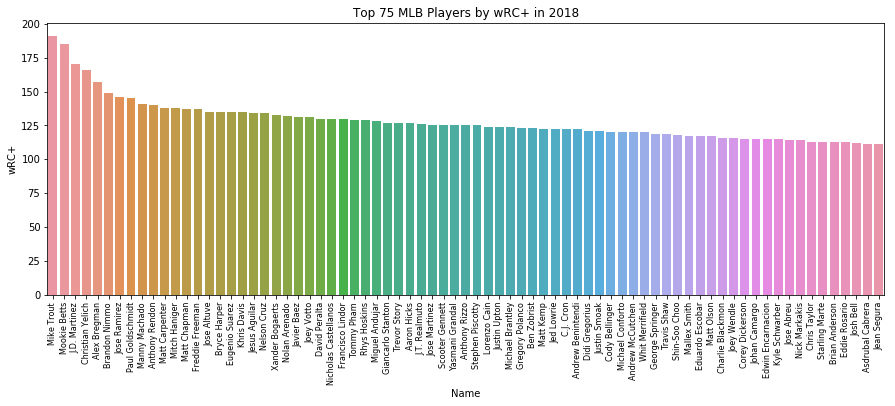

In [525]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="Name", y="wRC+", data=wRC_plus.head(75))
ax.set_xticklabels(wRC_plus['Name'], rotation='vertical', fontsize=8)
ax.set_title('Top 75 MLB Players by wRC+ in 2018')
plt.show()

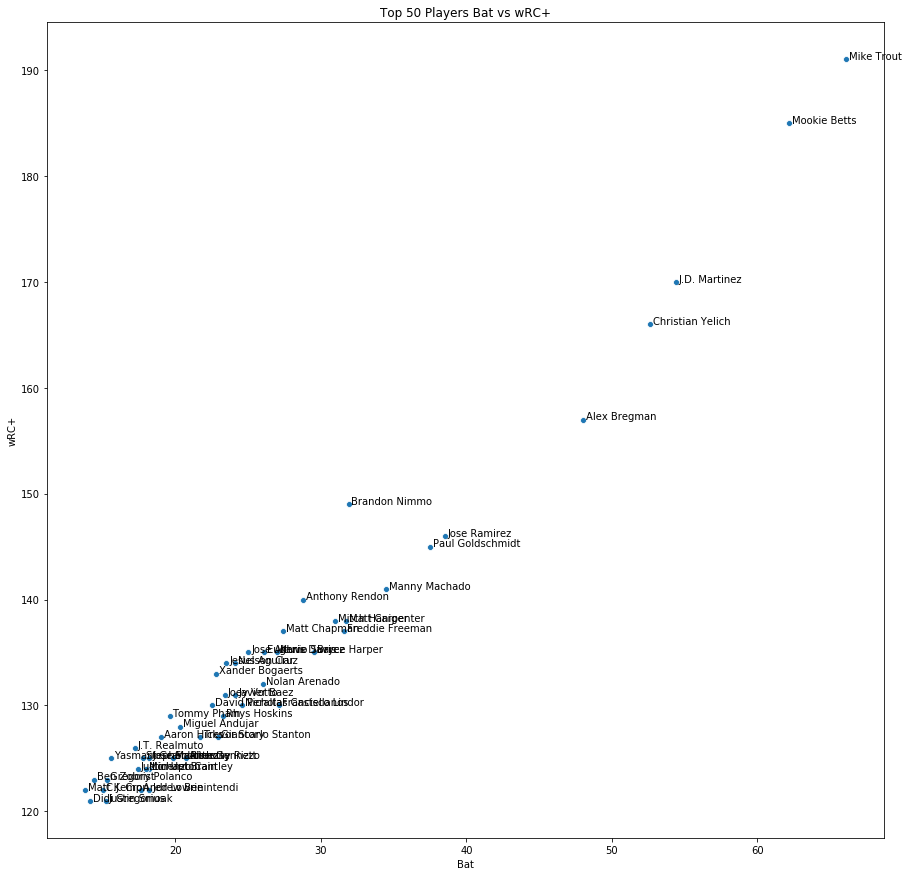

In [527]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Bat", y="wRC+", data=wRC_plus.head(50), markers=True)
ax.set_title("Top 50 Players Bat vs wRC+")

label_point(wRC_plus.head(50).Bat, wRC_plus.head(50)['wRC+'], wRC_plus.head(50).Name, plt.gca())